# Data preprocessing Notebook

## Information about data
* **Name:** Alaska_PM10_one_site
* **Format:** csv
* **Description:** data provides historical infomation about percentage of PM10 in air - more PM10 it contain, air condition become worse and worse.
* **Size:** 1389 rows with 2 columns: Data and PM10

In [9]:
DATA_PATH = "./data/Alaska_PM10_one_site.csv"

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(DATA_PATH)

print(df.head())

         Data  PM10
0  01/01/2022     6
1  01/02/2022    19
2  01/03/2022    19
3  01/04/2022    12
4  01/05/2022    11


In [15]:
time_series = df["PM10"].astype(float).values

def normalization(data_array):
    min_val = np.min(data_array)
    max_val = np.max(data_array)
    scaled = (data_array - min_val) / (max_val - min_val)
    return scaled

train_size = int(len(time_series) * 0.67)
train_data = normalization(time_series[:train_size])
test_data = normalization(time_series[train_size:])

np.save('train_data.npy', train_data)
np.save('test_data.npy', test_data)

print("Train Data Sample:", train_data[:5])
print("Test Data Sample:", test_data[:5])

Train Data Sample: [0.05555556 0.17592593 0.17592593 0.11111111 0.10185185]
Test Data Sample: [0.08571429 0.12380952 0.20952381 0.11428571 0.0952381 ]


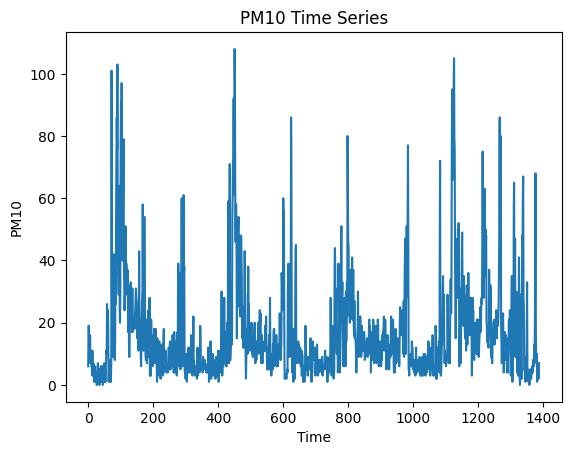

In [16]:
plt.plot(time_series)
plt.title("PM10 Time Series")
plt.xlabel("Time")
plt.ylabel("PM10")
plt.show()